# Modeling with Naive Bayes

#### We build multiple Naive Bayes Models to Train on cleaned text and variables: 
#### Relevancy_score (highly relevant (4), very relevant (3), relevant (2), minimally relevant (1), not relevant (0))
#### Treatment_Number (user receives treatment (1), user does not receive treatment (0))
#### Recommendation_Score (user recommends treatment (1), user does not recommend treatment (0))

In [1]:
#import the necessary library, modules, functions, settings 
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from seaborn import set_style
set_style("whitegrid")
import seaborn as sns

In [2]:
#load in the csv file containing the cleaned and formatted Reddit content as a data frame 
data_df = pd.read_csv("enumerated_suicidebpd_comments.csv")

In [3]:
#import the necessary library, modules, functions, settings 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix,  classification_report
from sklearn.model_selection import train_test_split
from collections import defaultdict
from imblearn.over_sampling import SMOTE

In [4]:
#vectorize text and create a train test split 
vectorizer1 = CountVectorizer()
vectors = vectorizer1.fit_transform(data_df.Comment)
X = data_df.Comment
y1 = data_df.Relevancy_Score
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, random_state=100, test_size=0.2, stratify=y1)
X_train_vect = vectorizer1.fit_transform(X_train)
sm = SMOTE(sampling_strategy='auto', k_neighbors=2)
X_train_res, y1_train_res = sm.fit_resample(X_train_vect, y1_train)

In [5]:
#Initialize and train an instance of Naive Bayes Classifier 
nb = MultinomialNB()
nb.fit(X_train_res, y1_train_res)

MultinomialNB()

In [6]:
# Make predictions
X_test_vect = vectorizer1.transform(X_test)
y1_pred = nb.predict(X_test_vect)

In [7]:
# Evaluate the model
print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("\nClassification Report:\n", classification_report(y1_test, y1_pred))

Accuracy: 0.5371900826446281

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.56      0.66        77
           1       0.42      0.67      0.52        33
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         3

    accuracy                           0.54       121
   macro avg       0.30      0.31      0.29       121
weighted avg       0.62      0.54      0.56       121



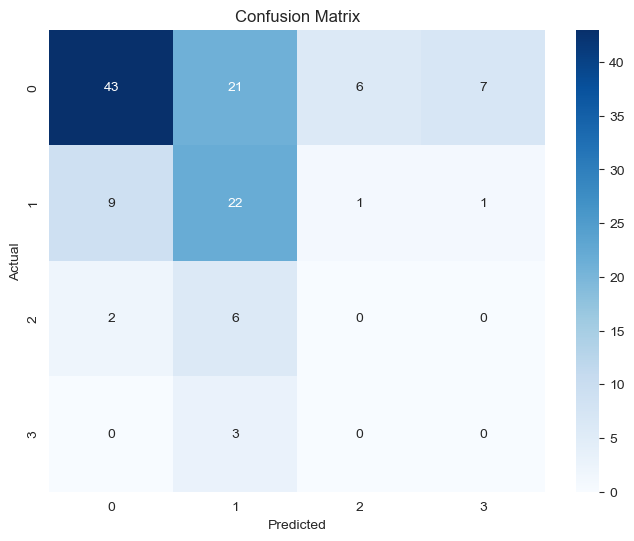

In [8]:
#Produce the confusion matrix 
cm = confusion_matrix(y1_test, y1_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [9]:
#vectorize text and create a train test split 
vectorizer1 = CountVectorizer()
vectors = vectorizer1.fit_transform(data_df.Comment)
X = data_df.Comment
y2 = data_df.Treatment_Number
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, random_state=200, test_size=0.2,stratify=y2)
X_train_vect = vectorizer1.fit_transform(X_train)
sm = SMOTE(sampling_strategy='auto', k_neighbors=2)
X_train_res, y2_train_res = sm.fit_resample(X_train_vect, y2_train)

In [10]:
#Initialize and train an instance of Naive Bayes Classifier 
nb = MultinomialNB()
nb.fit(X_train_res, y2_train_res)

MultinomialNB()

In [11]:
# Make predictions
X_test_vect = vectorizer1.transform(X_test)
y2_pred = nb.predict(X_test_vect)

In [12]:
# Evaluate the model
print("Accuracy:", accuracy_score(y2_test, y2_pred))
print("\nClassification Report:\n", classification_report(y2_test, y2_pred))

Accuracy: 0.8842975206611571

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       110
           1       0.00      0.00      0.00        11

    accuracy                           0.88       121
   macro avg       0.45      0.49      0.47       121
weighted avg       0.82      0.88      0.85       121



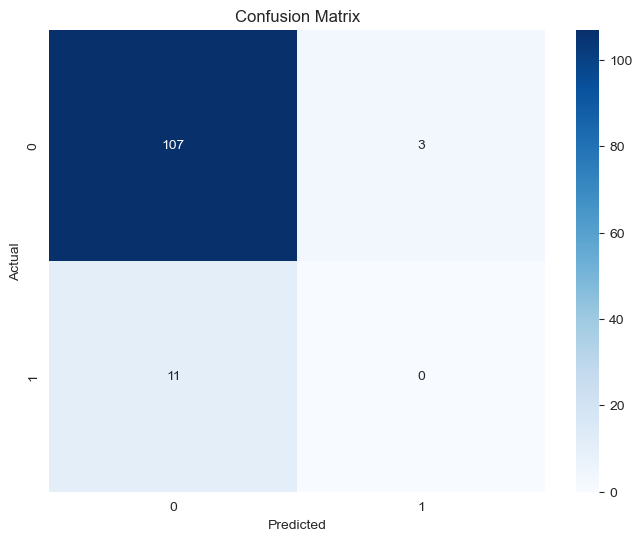

In [13]:
#Produce the confusion matrix 
cm = confusion_matrix(y2_test, y2_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [14]:
#vectorize text and create a train test split 
vectorizer1 = CountVectorizer()
vectors = vectorizer1.fit_transform(data_df.Comment)
X = data_df.Comment
y3 = data_df.Recommendation_Score
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, random_state=300, test_size=0.2,stratify=y3)
X_train_vect = vectorizer1.fit_transform(X_train)
sm = SMOTE(sampling_strategy='auto', k_neighbors=2)
X_train_res, y3_train_res = sm.fit_resample(X_train_vect, y3_train)

In [15]:
#Initialize and train an instance of Naive Bayes Classifier 
nb = MultinomialNB()
nb.fit(X_train_res, y3_train_res)

MultinomialNB()

In [16]:
# Make predictions
X_test_vect = vectorizer1.transform(X_test)
y3_pred = nb.predict(X_test_vect)

In [17]:
# Evaluate the model
print("Accuracy:", accuracy_score(y3_test, y3_pred))
print("\nClassification Report:\n", classification_report(y3_test, y3_pred))

Accuracy: 0.9173553719008265

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       117
           1       0.00      0.00      0.00         4

    accuracy                           0.92       121
   macro avg       0.48      0.47      0.48       121
weighted avg       0.93      0.92      0.93       121



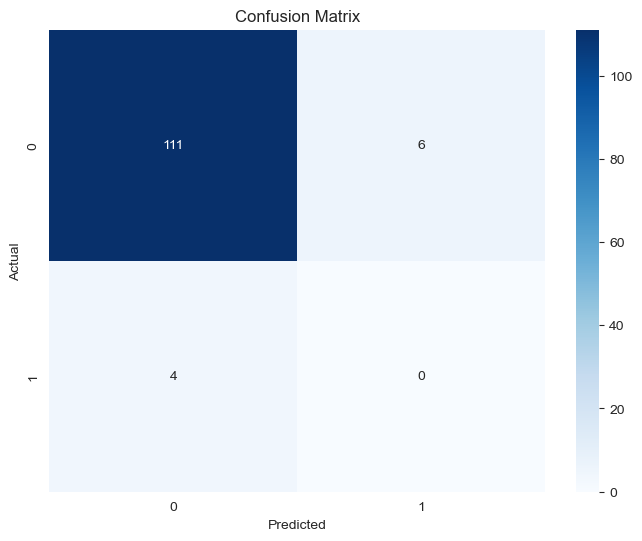

In [18]:
#Produce the confusion matrix 
cm = confusion_matrix(y3_test, y3_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [19]:
#vectorize text and create a train test split 
vectorizer2 = TfidfVectorizer()
vectors = vectorizer2.fit_transform(data_df.Comment)
X = data_df.Comment
y1 = data_df.Relevancy_Score
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, random_state=400, test_size=0.2,stratify=y1)
X_train_vect = vectorizer2.fit_transform(X_train)
sm = SMOTE(sampling_strategy='auto', k_neighbors=2)
X_train_res, y1_train_res = sm.fit_resample(X_train_vect, y1_train)

In [20]:
#Initialize and train an instance of Naive Bayes Classifier 
nb = MultinomialNB()
nb.fit(X_train_res, y1_train_res)

MultinomialNB()

In [21]:
# Make predictions
X_test_vect = vectorizer2.transform(X_test)
y1_pred = nb.predict(X_test_vect)

In [22]:
# Evaluate the model
print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("\nClassification Report:\n", classification_report(y1_test, y1_pred))

Accuracy: 0.1322314049586777

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.09      0.17        77
           1       0.18      0.15      0.16        33
           2       0.09      0.50      0.16         8
           3       0.00      0.00      0.00         3

    accuracy                           0.13       121
   macro avg       0.32      0.19      0.12       121
weighted avg       0.69      0.13      0.16       121



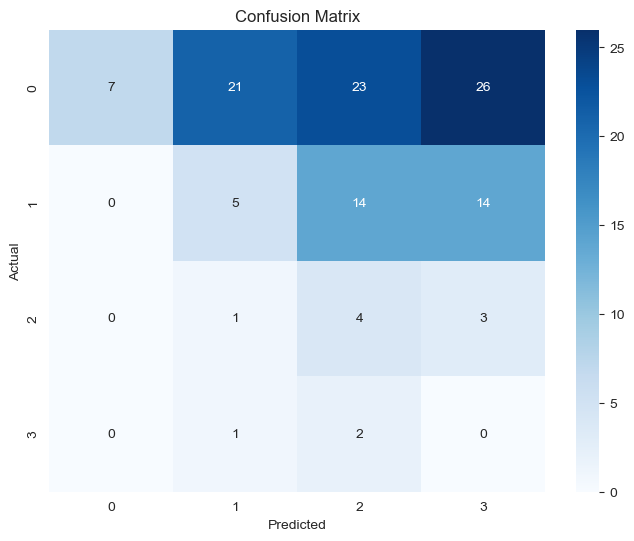

In [23]:
#Produce the confusion matrix 
cm = confusion_matrix(y1_test, y1_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [24]:
#vectorize text and create a train test split 
vectorizer2 = TfidfVectorizer()
vectors = vectorizer2.fit_transform(data_df.Comment)
X = data_df.Comment
y2 = data_df.Treatment_Number
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, random_state=500, test_size=0.2,stratify=y2)
X_train_vect = vectorizer2.fit_transform(X_train)
sm = SMOTE(sampling_strategy='auto', k_neighbors=2)
X_train_res, y2_train_res = sm.fit_resample(X_train_vect, y2_train)

In [25]:
#Initialize and train an instance of Naive Bayes Classifier 
nb = MultinomialNB()
nb.fit(X_train_res, y2_train_res)

MultinomialNB()

In [26]:
# Make predictions
X_test_vect = vectorizer2.transform(X_test)
y2_pred = nb.predict(X_test_vect)

In [27]:
# Evaluate the model
print("Accuracy:", accuracy_score(y2_test, y2_pred))
print("\nClassification Report:\n", classification_report(y2_test, y2_pred))

Accuracy: 0.33884297520661155

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.27      0.43       110
           1       0.12      1.00      0.22        11

    accuracy                           0.34       121
   macro avg       0.56      0.64      0.32       121
weighted avg       0.92      0.34      0.41       121



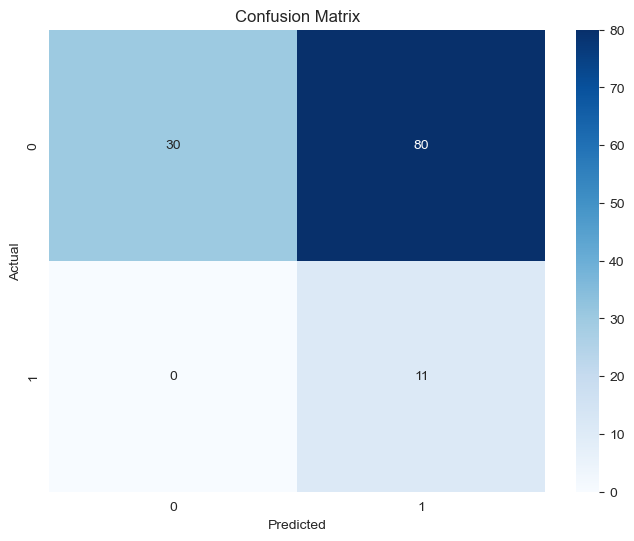

In [28]:
#Produce the confusion matrix 
cm = confusion_matrix(y2_test, y2_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [29]:
#vectorize text and create a train test split 
vectorizer2 = TfidfVectorizer()
vectors = vectorizer2.fit_transform(data_df.Comment)
X = data_df.Comment
y3 = data_df.Recommendation_Score
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, random_state=600, test_size=0.2,stratify=y3)
X_train_vect = vectorizer2.fit_transform(X_train)
sm = SMOTE(sampling_strategy='auto', k_neighbors=2)
X_train_res, y3_train_res = sm.fit_resample(X_train_vect, y3_train)

In [30]:
#Initialize and train an instance of Naive Bayes Classifier 
nb = MultinomialNB()
nb.fit(X_train_res, y3_train_res)

MultinomialNB()

In [31]:
# Make predictions
X_test_vect = vectorizer2.transform(X_test)
y3_pred = nb.predict(X_test_vect)

In [32]:
# Evaluate the model
print("Accuracy:", accuracy_score(y3_test, y3_pred))
print("\nClassification Report:\n", classification_report(y3_test, y3_pred))

Accuracy: 0.6694214876033058

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.67      0.80       117
           1       0.07      0.75      0.13         4

    accuracy                           0.67       121
   macro avg       0.53      0.71      0.46       121
weighted avg       0.96      0.67      0.77       121



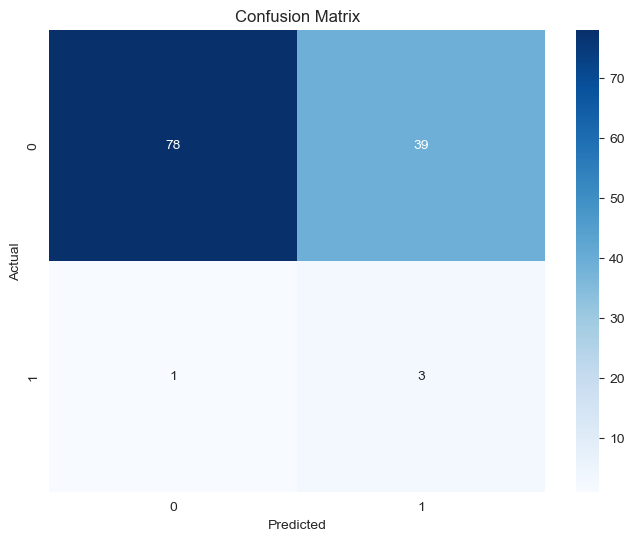

In [33]:
#Produce the confusion matrix 
cm = confusion_matrix(y3_test, y3_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()